# Lab 1

## Exploring Data

In [174]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm
import scipy.stats as stats
from scipy.stats import pearsonr
from pandas.plotting import parallel_coordinates
from ChernoffFace import *

In [175]:
# data from csv
auto_df = pd.read_csv('ST83446_Auto-mpg_dataset.csv')

In [176]:
auto_df.shape

(54, 9)

In [177]:
#peak inside
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Car model
0,15.0,8,383,170,3563,10.0,70,1,dodge
1,15.0,8,400,150,3761,9.5,70,1,chevrolet
2,14.0,8,455,225,3086,10.0,70,1,buick
3,21.0,6,200,85,2587,16.0,70,1,ford
4,27.0,4,97,88,2130,14.5,70,3,datsun


In [178]:
auto_df.dtypes

mpg             float64
cylinders         int64
displacement      int64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
origin            int64
Car model        object
dtype: object

## Data Correction

*From Specification.txt*

Attribute Information:

* mpg: continuous
* cylinders: multi-valued discrete
* displacement: continuous
* horsepower: continuous
* weight: continuous
* acceleration: continuous
* model year: multi-valued discrete
* origin: multi-valued discrete
* car name: string (unique for each instance)
* Missing Attribute Values: horsepower has 6 missing values

In [179]:
mask = auto_df.isin(['?']).any()
print(mask)

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
Car model       False
dtype: bool


In [180]:
auto_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
Car model       0
dtype: int64

In [181]:
auto_df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
Car model       0
dtype: int64

No need to handle null/missing values

In [182]:
# adjustment for continous. discrete needs to be adjusted to category
auto_df['displacement'] = auto_df['displacement'].astype('float')
auto_df['horsepower'] = auto_df['horsepower'].astype('float')
auto_df['weight'] = auto_df['weight'].astype('int')
auto_df['origin'] = auto_df['origin'].astype('category')
auto_df['Car model'] = auto_df['Car model'].astype('category')

In [183]:
auto_df.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower       float64
weight             int64
acceleration     float64
model year         int64
origin          category
Car model       category
dtype: object

## Data Visualization


### Histograms

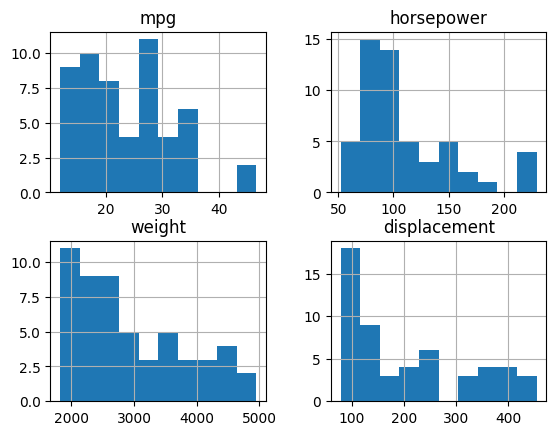

In [184]:
auto_df[['mpg','horsepower','weight','displacement']].hist();


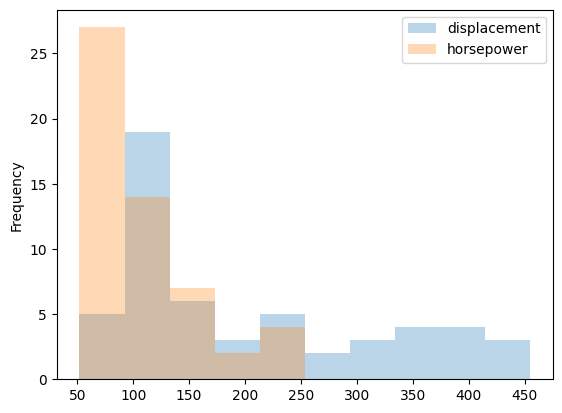

In [185]:
auto_df[['displacement','horsepower']].plot.hist(histtype = "stepfilled", bins=10, alpha=0.3);

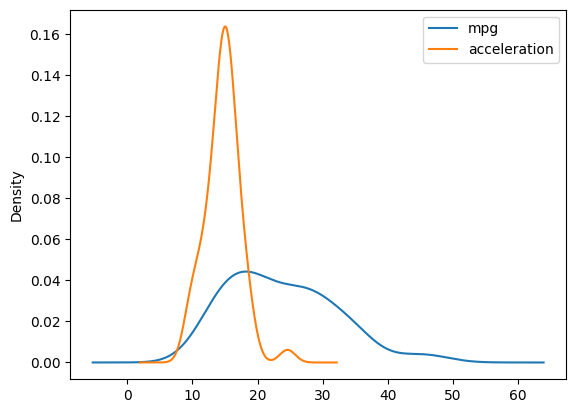

In [186]:
auto_df[['mpg','acceleration']].plot.density();

In [187]:
auto_df['Car model'].value_counts()

Car model
chevrolet      6
buick          5
plymouth       4
datsun         4
dodge          4
amc            3
volkswagen     3
chrysler       3
toyota         3
ford           3
pontiac        3
mazda          2
mercury        2
volvo          1
renault        1
honda          1
oldsmobile     1
audi           1
fiat           1
cadillac       1
bmw            1
vw             1
Name: count, dtype: int64

In [188]:
auto_df['origin'].value_counts()

origin
1    35
3    10
2     9
Name: count, dtype: int64

In [189]:
auto_df['cylinders'].value_counts()

cylinders
4    29
8    14
6    11
Name: count, dtype: int64

In [190]:
auto_df['model year'].value_counts()

model year
73    8
70    7
78    6
72    5
76    5
71    4
75    4
82    4
77    3
79    3
81    3
80    2
Name: count, dtype: int64

### Box Plots for Cylinders and Countries

<Axes: >

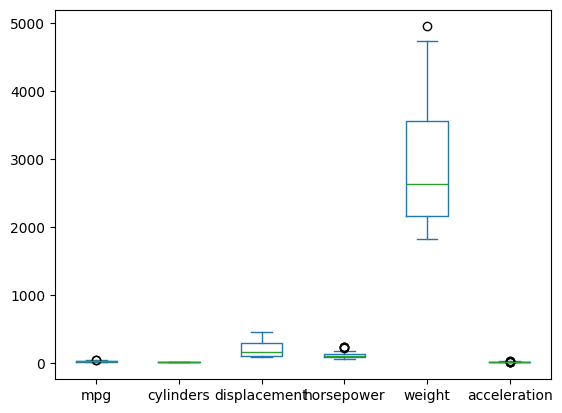

In [191]:
auto_df[["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration"]].plot.box(whis=1)

<Axes: >

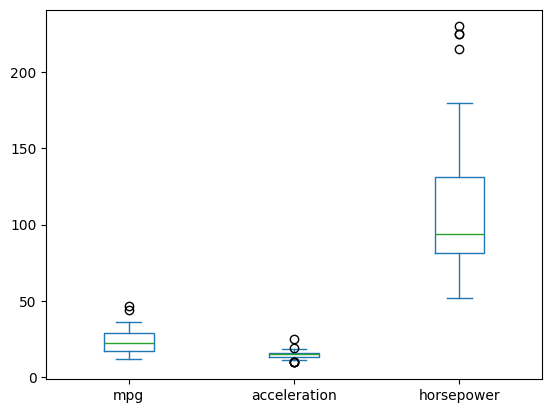

In [192]:
auto_df[['mpg',"acceleration",'horsepower']].plot.box(whis=1)

In [193]:
# helper functions for mask for parameter
def masked_cylinder_auto(column: str) -> list:
    mask = [auto_df[auto_df['cylinders']== 4][column],
            auto_df[auto_df['cylinders']== 6][column],
            auto_df[auto_df['cylinders']== 8][column],
    ]
    return mask

def masked_origin_auto(column: str) -> list:
    mask = [auto_df[auto_df['origin']== 1][column],
            auto_df[auto_df['origin']== 2][column],
            auto_df[auto_df['origin']== 3][column],
    ]
    return mask

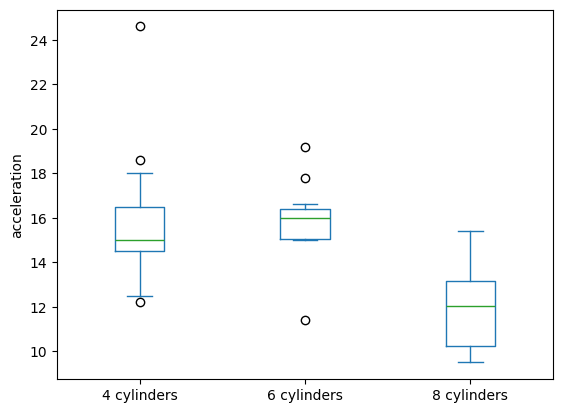

In [194]:
cylinder_labels = ("4 cylinders", "6 cylinders", "8 cylinders")
pd.DataFrame(masked_cylinder_auto("acceleration"),
              index=cylinder_labels).T.plot.box(whis=1, ylabel='acceleration');
              

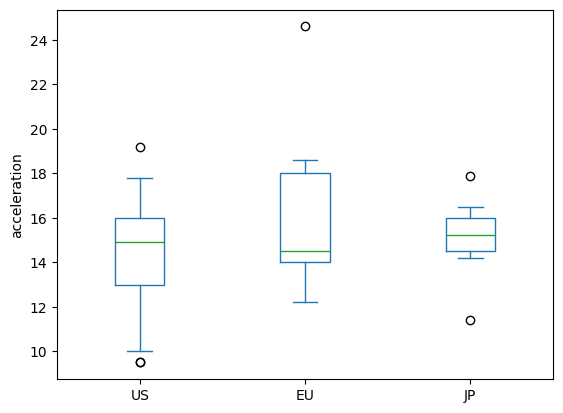

In [195]:
origin_lables = ('US','EU','JP')
pd.DataFrame(masked_origin_auto("acceleration"),
             index=origin_lables).T.plot.box(whis=1, ylabel='acceleration');

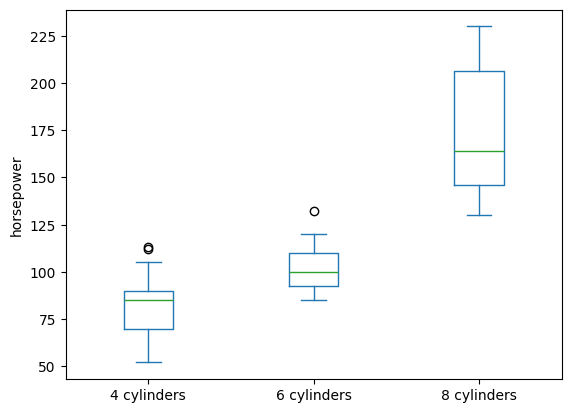

In [196]:
pd.DataFrame(masked_cylinder_auto("horsepower"),
            index=cylinder_labels).T.plot.box(whis=1,ylabel='horsepower');

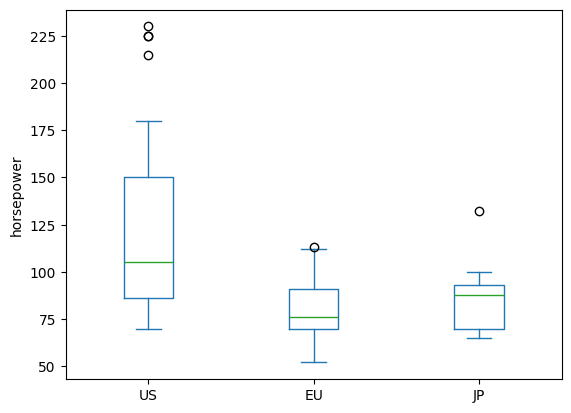

In [197]:
origin_labels = ('US','EU','JP')
pd.DataFrame(masked_origin_auto("horsepower"),
             index=origin_labels).T.plot.box(whis=1, ylabel='horsepower');

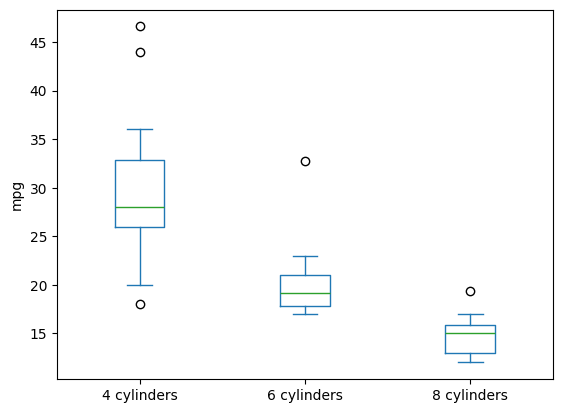

In [198]:
pd.DataFrame(masked_cylinder_auto('mpg'),
            index=cylinder_labels).T.plot.box(whis=1,ylabel='mpg');

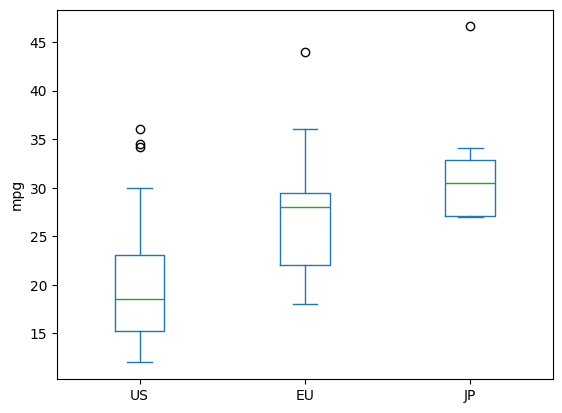

In [199]:
pd.DataFrame(masked_origin_auto("mpg"),
             index=origin_labels).T.plot.box(whis=1,ylabel='mpg');

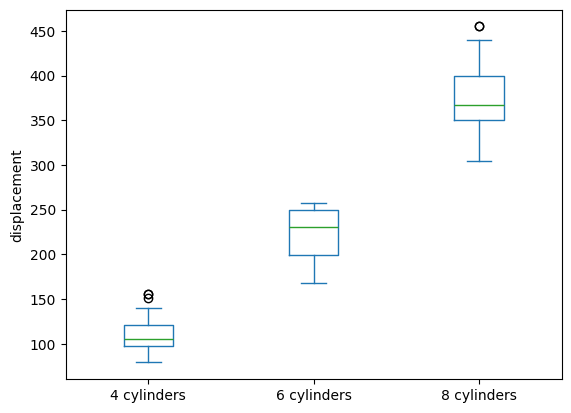

In [200]:
pd.DataFrame(masked_cylinder_auto('displacement'),
            index=cylinder_labels).T.plot.box(whis=1,ylabel='displacement');
            

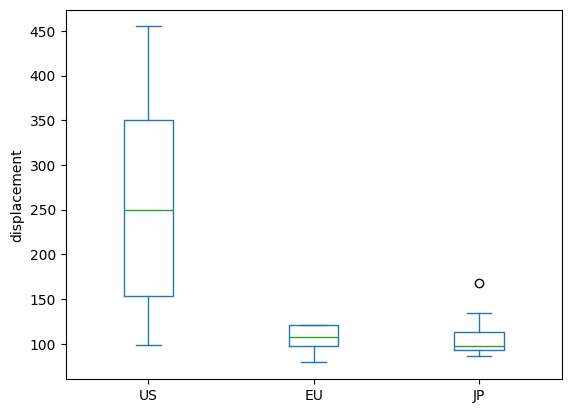

In [201]:
origin_labels = ('US','EU','JP')
pd.DataFrame(masked_origin_auto('displacement'),
            index=origin_labels).T.plot.box(whis=1,ylabel='displacement');

### Paralled Coordinates for Cylinders and Countries /w outliers

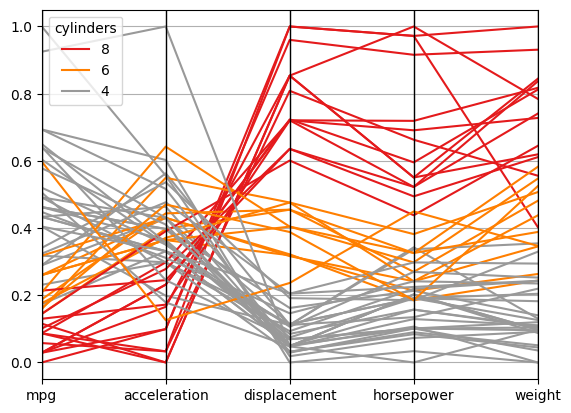

In [202]:
#min-max normalization rescaled and changed cylinders to category to not be normalized
auto_df['cylinders'] = auto_df['cylinders'].astype('category')
parallel0_df = variables_rescale(auto_df[['cylinders','mpg','acceleration','displacement','horsepower','weight']])
auto_df['cylinders'] = auto_df['cylinders'].astype('int')
parallel_coordinates(parallel0_df, 'cylinders', colormap=plt.get_cmap("Set1"))
plt.legend(title='cylinders')
plt.show()

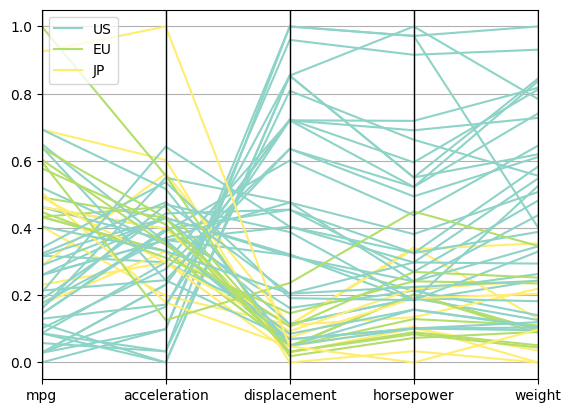

In [203]:
parallel1_df = variables_rescale(auto_df[['origin','mpg','acceleration','displacement','horsepower','weight']])
parallel_coordinates(parallel1_df, 'origin', colormap=plt.get_cmap("Set3"))
handles, labels = plt.gca().get_legend_handles_labels()
renamed_labels = [x for x in origin_labels]
plt.legend(handles, renamed_labels)
plt.show()

### Chernoff Faces for models and years w/ outliers

In [204]:
auto_df.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower       float64
weight             int64
acceleration     float64
model year         int64
origin          category
Car model       category
dtype: object

In [205]:
chernoff_data0 = auto_df[["Car model","mpg","displacement","horsepower","weight","acceleration"]].groupby(["Car model"]).mean()

/var/folders/gp/6f7wmxfj5xn475t83fsklqcr0000gn/T/ipykernel_31046/612173328.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chernoff_data0 = auto_df[["Car model","mpg","displacement","horsepower","weight","acceleration"]].groupby(["Car model"]).mean()


In [206]:
rescaled_df0 = variables_rescale(chernoff_data0.reset_index())
rescaled_df0.head()

,Car model,mpg,displacement,horsepower,weight,acceleration
0,amc,0.086061,0.587946,0.388021,0.492629,0.309333
1,audi,0.127273,0.129151,0.304688,0.296282,0.152000
2,bmw,0.345455,0.154982,0.476562,0.160078,0.032000
3,buick,0.054545,0.890775,0.867188,0.642348,0.052800
4,cadillac,0.000000,1.000000,1.000000,1.000000,0.000000


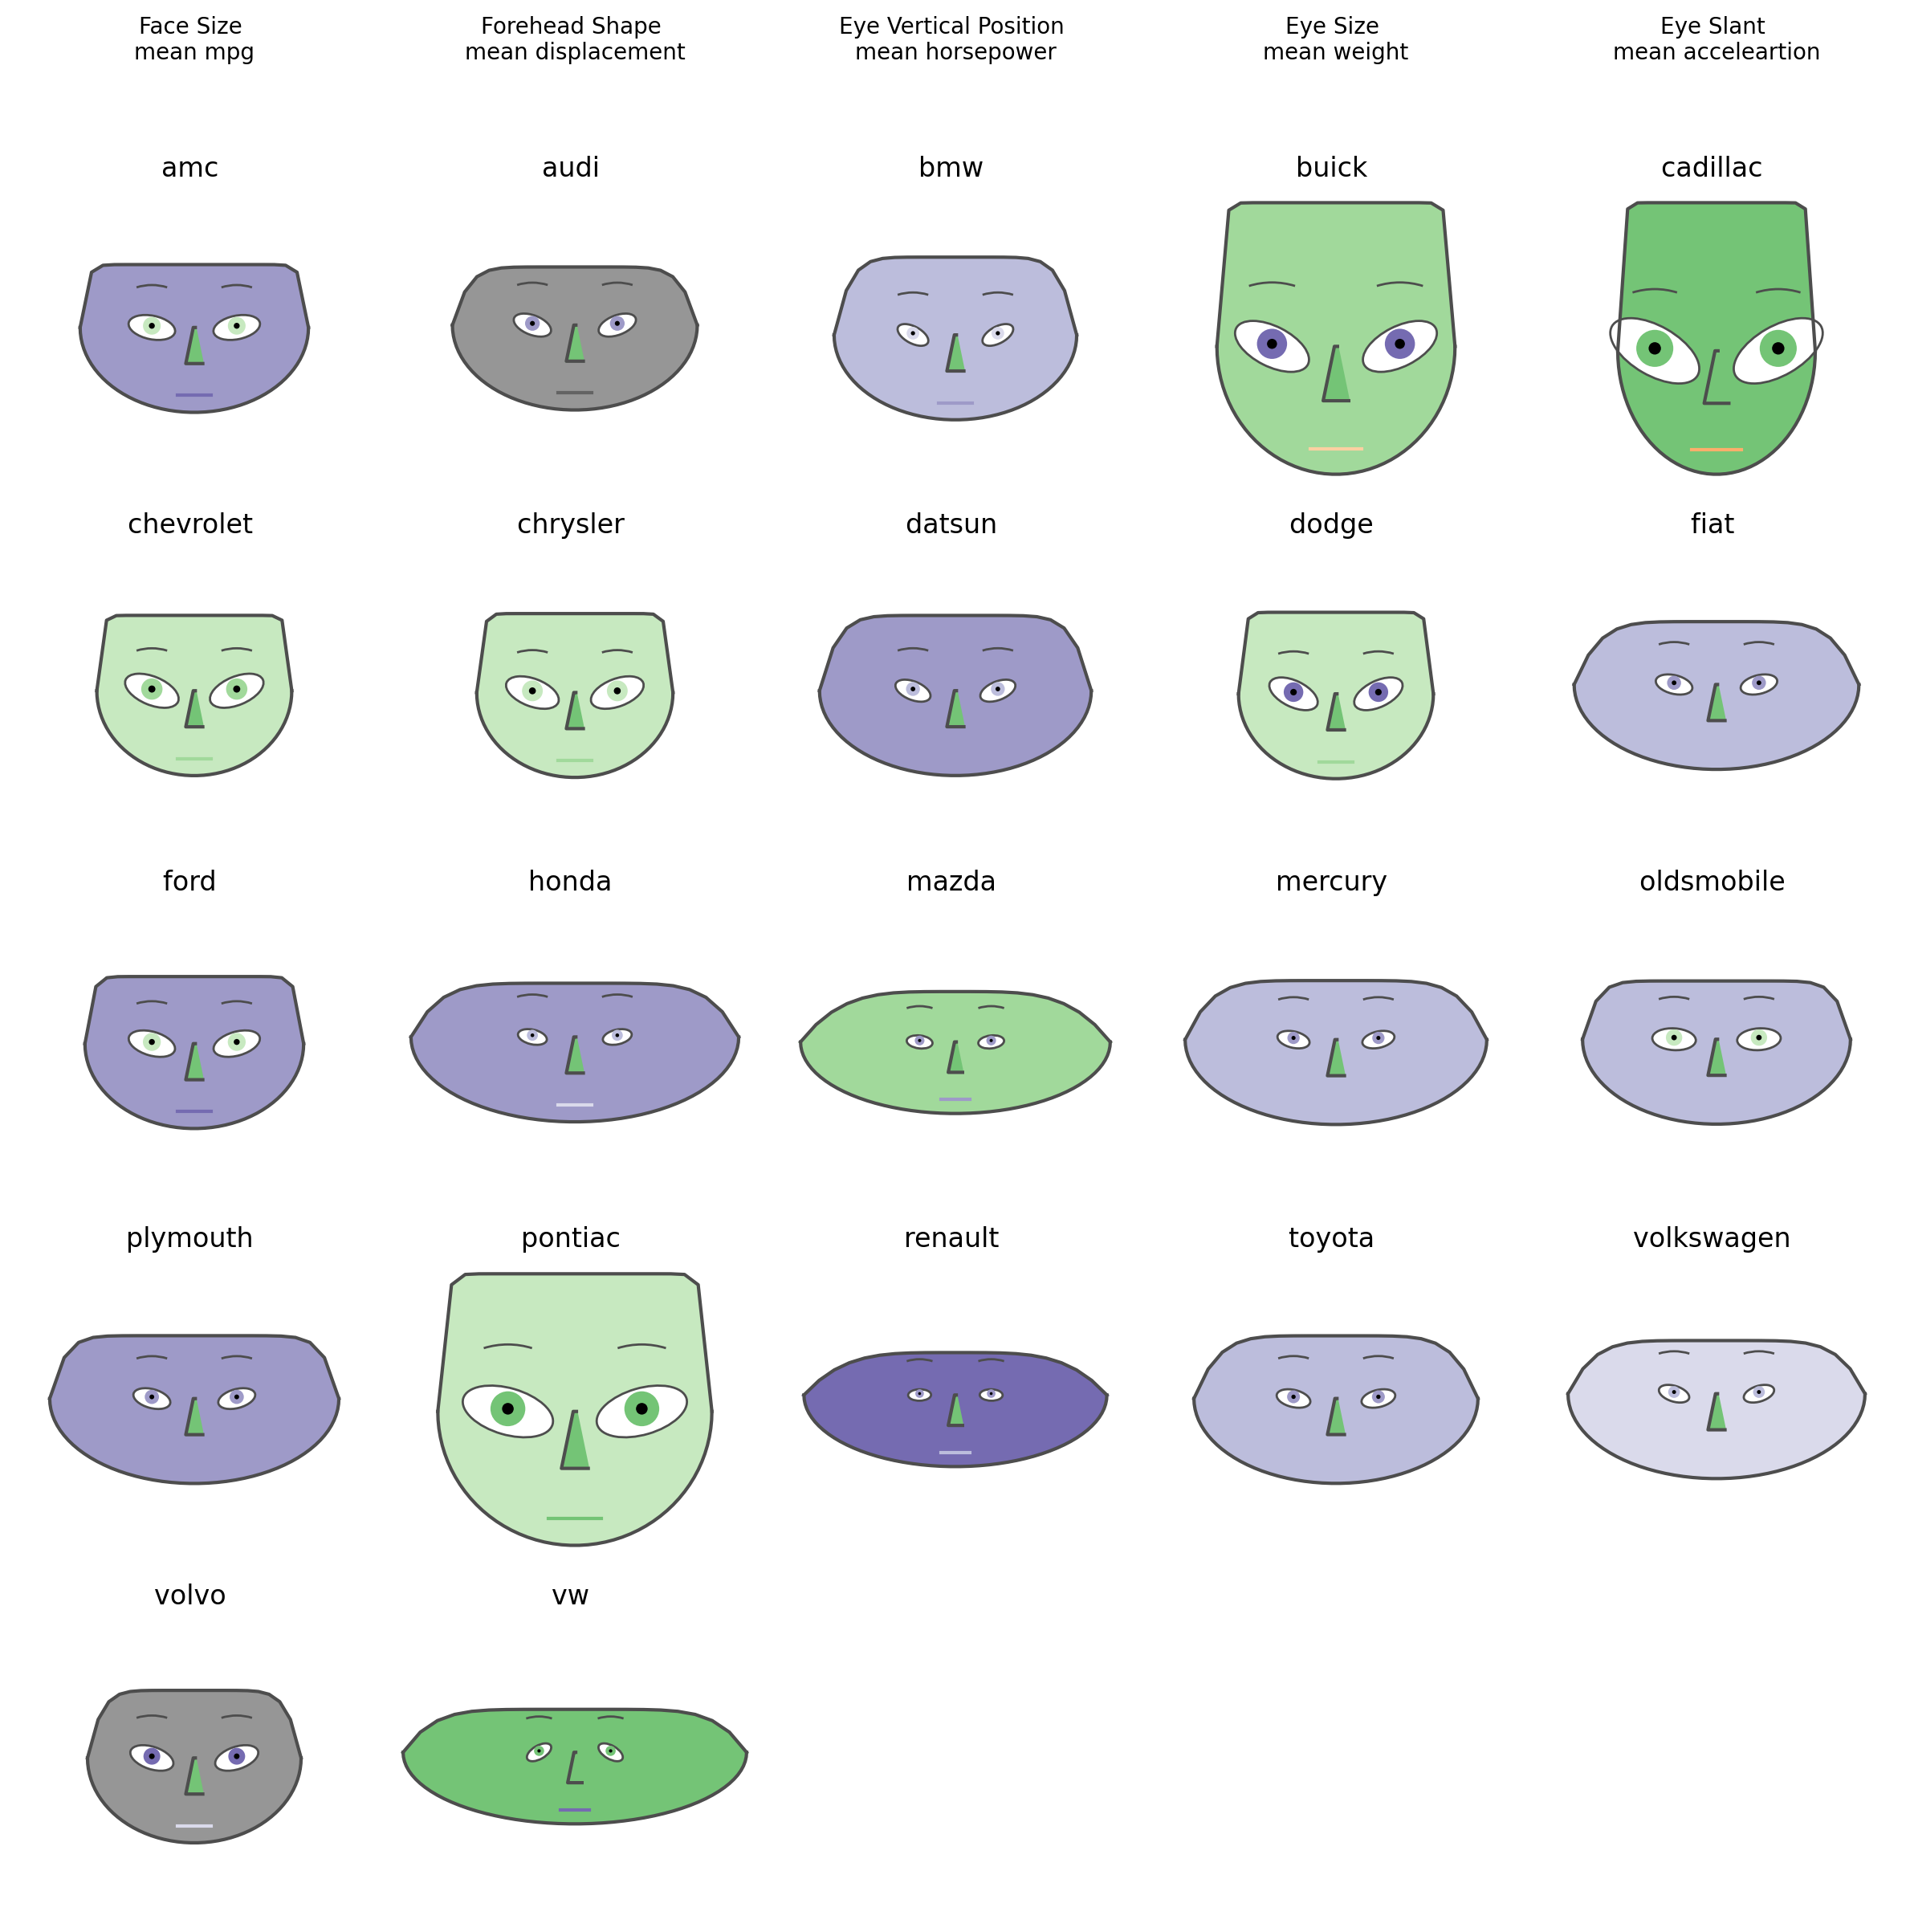

In [207]:
fig = chernoff_face(data=rescaled_df0,
                    n_columns=5,
                    long_face=False,
                    color_mapper=matplotlib.cm.tab20c_r,
                    figsize=(12,12), dpi =200)
axes = fig.get_axes()

label_positions = [(.5, 1.5), (.5, 1.5), (.5, 1.5), (.5, 1.5), (.5, 1.5)]  
label_text = ['Face Size \nmean mpg', 'Forehead Shape \nmean displacement', 
                'Eye Vertical Position \nmean horsepower', 'Eye Size \nmean weight'
                , 'Eye Slant \nmean acceleartion']  

# Add labels to each axis
for ax, pos, label in zip(axes, label_positions, label_text):
    x, y = pos
    ax.text(x, y, label, ha='center', va='center', transform=ax.transAxes, fontsize=10)


plt.tight_layout()

# Display the plot
plt.show()

In [208]:
chernoff_data1 = auto_df[["model year","mpg","displacement","horsepower","weight","acceleration"]]
chernoff_data1['model year'] = chernoff_data1['model year'].astype('category')
chernoff_data1 = chernoff_data1.groupby(["model year"]).mean()

/var/folders/gp/6f7wmxfj5xn475t83fsklqcr0000gn/T/ipykernel_31046/3813872312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chernoff_data1['model year'] = chernoff_data1['model year'].astype('category')
/var/folders/gp/6f7wmxfj5xn475t83fsklqcr0000gn/T/ipykernel_31046/3813872312.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chernoff_data1 = chernoff_data1.groupby(["model year"]).mean()


In [209]:
rescaled_df1 = variables_rescale(chernoff_data1.reset_index())
rescaled_df1.head()

,model year,mpg,displacement,horsepower,weight,acceleration
0,70,0.184640,0.677632,0.631366,0.356026,0.011186
1,71,0.345005,0.183114,0.213642,0.154127,0.436242
2,72,0.330587,0.005702,0.186873,0.118833,0.637584
3,73,0.000000,1.000000,1.000000,1.000000,0.000000
4,75,0.334706,0.357456,0.306306,0.376786,0.413870


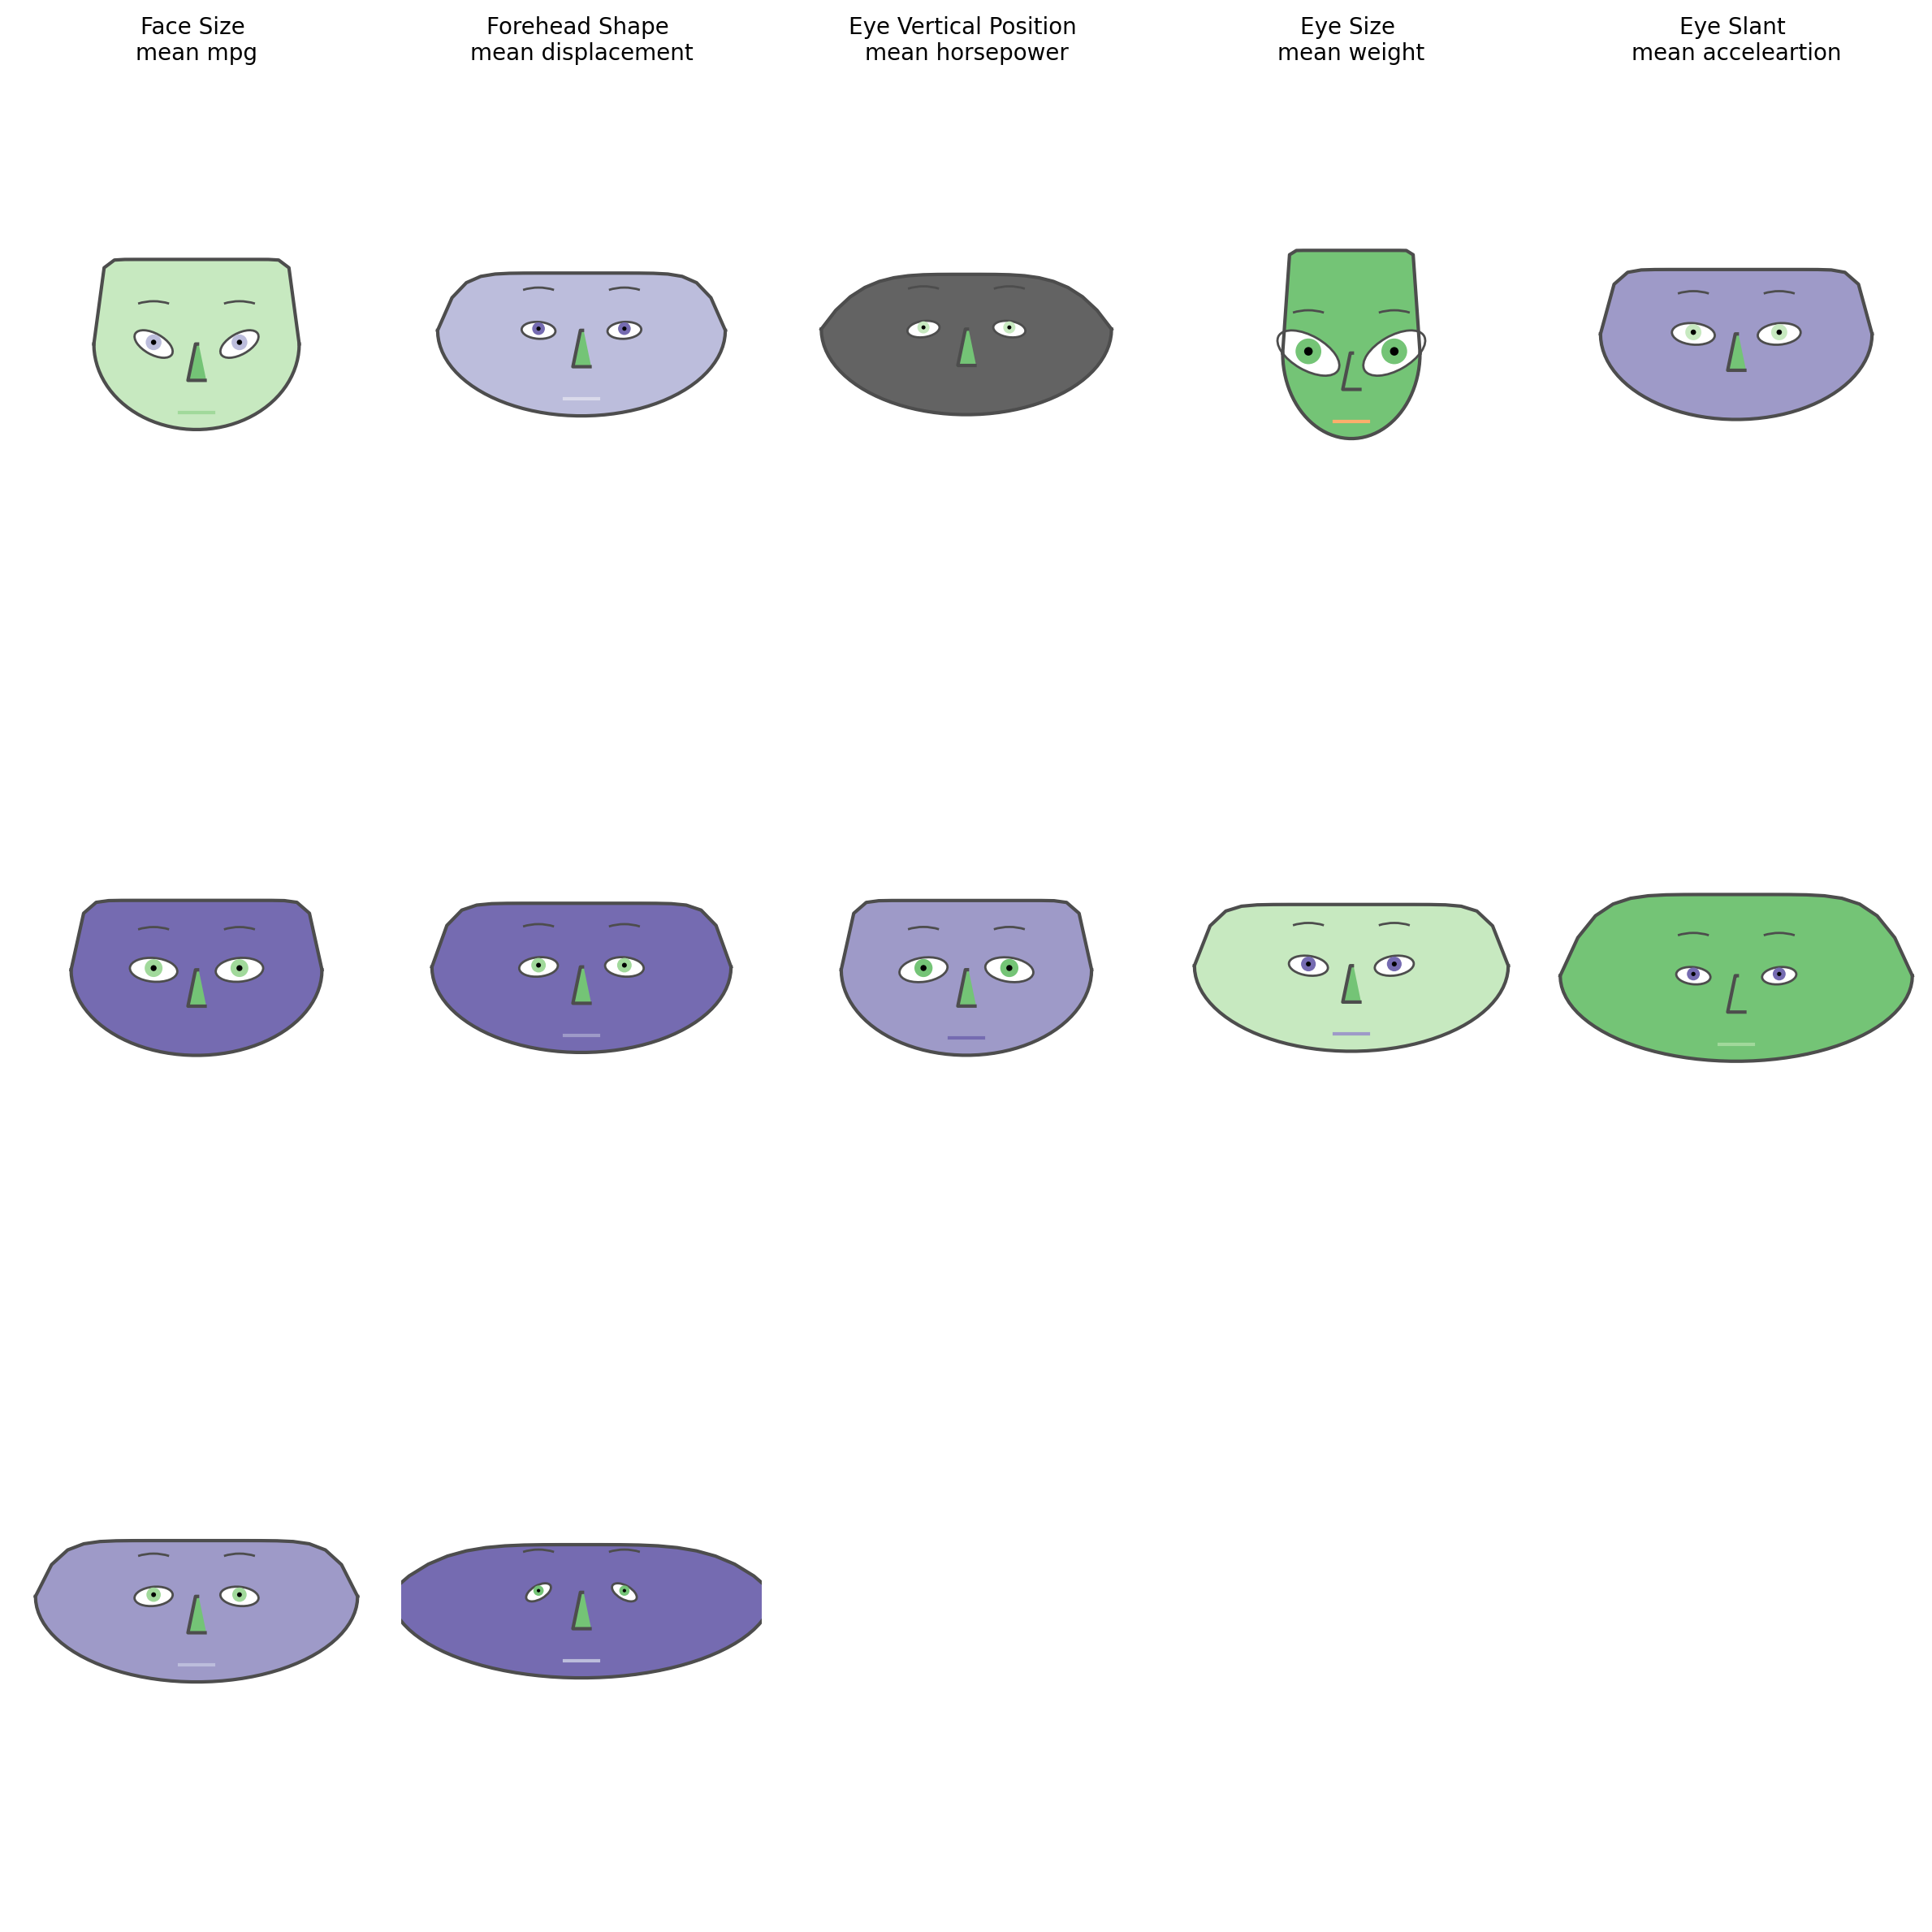

In [210]:

fig = chernoff_face(data=rescaled_df1,
                    n_columns=5,
                    long_face=False,
                    color_mapper=matplotlib.cm.tab20c_r,
                    figsize=(12,12), dpi =200)
axes = fig.get_axes()

label_positions = [(.5, 1), (.5, 1), (.5, 1), (.5, 1), (.5, 1)]  
label_text = ['Face Size \nmean mpg', 'Forehead Shape \nmean displacement', 
                'Eye Vertical Position \nmean horsepower', 'Eye Size \nmean weight'
                , 'Eye Slant \nmean acceleartion']  # Example labels

# Add labels to each axis
for ax, pos, label in zip(axes, label_positions, label_text):
    x, y = pos
    ax.text(x, y, label, ha='center', va='center', transform=ax.transAxes, fontsize=10)

# Adjust layout (optional)
plt.tight_layout()

# Display the plot
plt.show()

I have no idea why the year isn't being labeled here

### Descriptive stats   

In [211]:
auto_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,54.0,23.672222,8.106960,12.0,17.125,22.50,28.75,46.6
cylinders,54.0,5.444444,1.711963,4.0,4.000,4.00,7.50,8.0
displacement,54.0,203.018519,117.102034,79.0,105.000,153.50,293.25,455.0
horsepower,54.0,110.037037,44.663084,52.0,81.250,93.50,131.50,230.0
weight,54.0,2936.407407,867.845381,1825.0,2165.750,2631.50,3556.00,4951.0
acceleration,54.0,14.716667,2.678126,9.5,13.200,14.85,16.00,24.6
model year,54.0,75.277778,3.848139,70.0,72.000,75.00,78.00,82.0


In [212]:
auto_df.median(numeric_only=True)

mpg               22.50
cylinders          4.00
displacement     153.50
horsepower        93.50
weight          2631.50
acceleration      14.85
model year        75.00
dtype: float64

In [213]:
auto_df[["Car model", "origin"]].describe()

,Car model,origin
count,54,54
unique,22,3
top,chevrolet,1
freq,6,35


In [214]:
auto_df.quantile(0.25, numeric_only=True)

mpg               17.125
cylinders          4.000
displacement     105.000
horsepower        81.250
weight          2165.750
acceleration      13.200
model year        72.000
Name: 0.25, dtype: float64

In [215]:
auto_df.quantile(0.75, numeric_only=True)

mpg               28.75
cylinders          7.50
displacement     293.25
horsepower       131.50
weight          3556.00
acceleration      16.00
model year        78.00
Name: 0.75, dtype: float64

In [216]:
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Car model
0,15.0,8,383.0,170.0,3563,10.0,70,1,dodge
1,15.0,8,400.0,150.0,3761,9.5,70,1,chevrolet
2,14.0,8,455.0,225.0,3086,10.0,70,1,buick
3,21.0,6,200.0,85.0,2587,16.0,70,1,ford
4,27.0,4,97.0,88.0,2130,14.5,70,3,datsun


In [217]:
# Using z-score for removing outliers
z = np.abs(stats.zscore(auto_df[['mpg','cylinders','displacement','horsepower','weight','acceleration','model year']]))
auto_clean = auto_df[(z<3).all(axis=1)]
print('original shape:',auto_df.shape,'cleaned shaped:',auto_clean.shape)

original shape: (54, 9) cleaned shaped: (53, 9)


In [218]:
auto_clean.describe().T


,count,mean,std,min,25%,50%,75%,max
mpg,53.0,23.288679,7.673999,12.0,17.0,22.0,28.0,46.6
cylinders,53.0,5.471698,1.716479,4.0,4.0,4.0,8.0,8.0
displacement,53.0,205.018868,117.287531,79.0,105.0,156.0,305.0,455.0
horsepower,53.0,111.132075,44.352624,58.0,85.0,95.0,132.0,230.0
weight,53.0,2951.622642,868.848536,1825.0,2171.0,2648.0,3563.0,4951.0
acceleration,53.0,14.530189,2.323011,9.5,13.2,14.8,16.0,19.2
model year,53.0,75.150943,3.769290,70.0,72.0,75.0,78.0,82.0


### Correlation matrix

In [219]:
auto_clean_num = auto_clean.select_dtypes(include = ['float64', 'int64','float32', 'int32'])
auto_clean_cat = auto_clean.select_dtypes(include = ['object','category'])
auto_clean_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           53 non-null     float64
 1   cylinders     53 non-null     int64  
 2   displacement  53 non-null     float64
 3   horsepower    53 non-null     float64
 4   weight        53 non-null     int64  
 5   acceleration  53 non-null     float64
 6   model year    53 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 3.3 KB


In [220]:
auto_clean_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   origin     53 non-null     category
 1   Car model  53 non-null     category
dtypes: category(2)
memory usage: 1.4 KB


In [221]:
auto_clean_num.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.779198,-0.825607,-0.729208,-0.825135,0.433151,0.474156
cylinders,-0.779198,1.000000,0.959480,0.843113,0.908405,-0.560201,-0.219280
displacement,-0.825607,0.959480,1.000000,0.912657,0.920949,-0.611581,-0.272619
horsepower,-0.729208,0.843113,0.912657,1.000000,0.838144,-0.740831,-0.311743
weight,-0.825135,0.908405,0.920949,0.838144,1.000000,-0.465649,-0.136532
acceleration,0.433151,-0.560201,-0.611581,-0.740831,-0.465649,1.000000,0.357242
model year,0.474156,-0.219280,-0.272619,-0.311743,-0.136532,0.357242,1.000000


<Axes: >

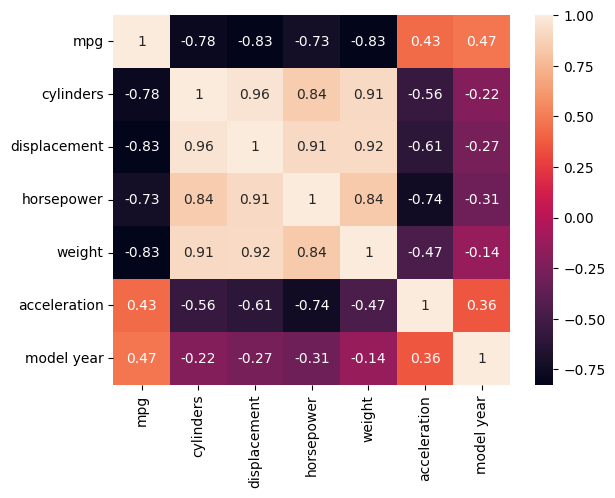

In [222]:
sns.heatmap(auto_clean_num.corr(), annot=True)

In [223]:
res=pearsonr(auto_clean_num["displacement"], auto_clean_num["horsepower"])
print(f"correlation between displacement and horsepower value is {round(res[0],4)} and p-value is {res[1]:.3E}")

correlation between displacement and horsepower value is 0.9127 and p-value is 1.850E-21


In [224]:
res=pearsonr(auto_clean_num["mpg"], auto_clean_num["weight"])
print(f"correlation value between mpg and weight is {round(res[0],4)} and p-value is {res[1]:.3E}")

correlation value between mpg and weight is -0.8251 and p-value is 3.004E-14


In [225]:
pd.crosstab(auto_clean["Car model"], columns=auto_clean["cylinders"])

cylinders,4,6,8
Car model,,,
amc,0,3,0
audi,1,0,0
bmw,1,0,0
buick,1,1,3
cadillac,0,0,1
chevrolet,1,1,4
chrysler,1,1,1
datsun,3,1,0
dodge,1,0,3


### Scatter plots for + and - correlation

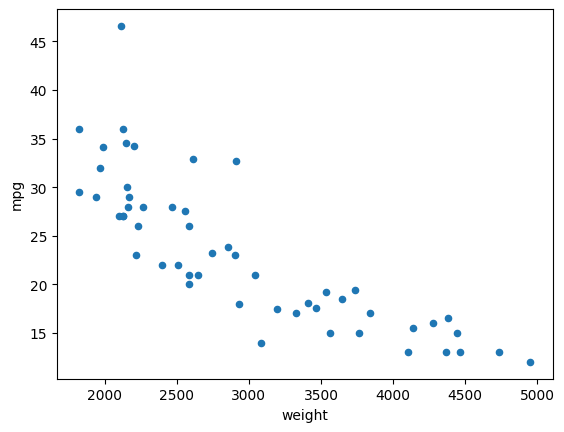

In [226]:
auto_clean.plot.scatter(x='weight',y='mpg');

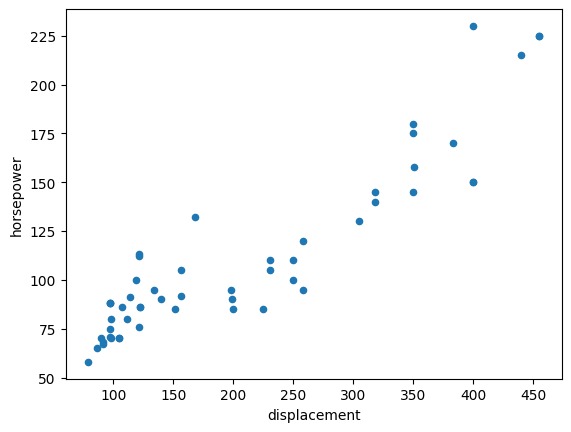

In [227]:
auto_clean.plot.scatter(x='displacement',y='horsepower');

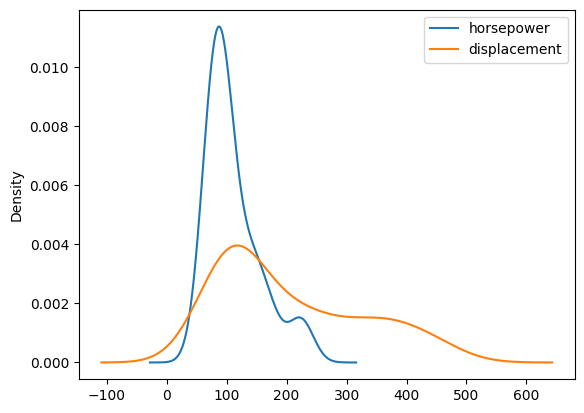

In [228]:
auto_clean[['horsepower','displacement']].plot.density();